In [1]:
import datetime
from dateutil.relativedelta import relativedelta
#from datetime import timedelta
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns


from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go



# import plotly.plotly as py
# import plotly.graph_objs as go

•	How do wait times change?  
•	Are the items selling within the timeframes we expected?  
•	Offer consistency?  
•	What are the aspects that a test store has to test before we roll out to all test stores.  
•	Rejected buys—increase/decrease and compared to chain  
•	Rejected buys—how does the merchandise rank within the buy—A/B/C/D/E    
•	Do scan rates increase with new release?  
•	What percent of offers is changed?  


In [2]:
dict_dtypes={'BusinessDate': object, 'LocationNo': str}
df_BuyHeaderMetrics = pd.read_csv('./BuyHeaderMetrics.csv', dtype=dict_dtypes, header=0, index_col=0)
df_BuyItemMetrics = pd.read_csv('./BuyItemMetrics.csv', dtype=dict_dtypes, header=0, index_col=0)

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df_BuyHeaderMetrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25716 entries, 0 to 25715
Data columns (total 97 columns):
BusinessDate                                    25716 non-null object
LocationNo                                      25716 non-null object
VersionNo                                       3804 non-null object
TestGroup                                       543 non-null float64
BuyType                                         25716 non-null object
total_BuyTransactions                           25716 non-null int64
total_BuyOffers                                 25716 non-null float64
total_BuyItems                                  25716 non-null int64
total_ScannedQuantity                           25569 non-null float64
total_ScannedOffers                             25569 non-null float64
total_SuggestedOfferQuantity                    3813 non-null float64
total_SuggestedOffers                           3813 non-null float64
total_BuyWait_Sec                               2571

In [4]:
StartDate = '2019-01-01'
filt_DropBeforeStartDate = df_BuyHeaderMetrics['BusinessDate'] < StartDate
df_BuyHeaderMetrics = df_BuyHeaderMetrics.drop(df_BuyHeaderMetrics.index[filt_DropBeforeStartDate], axis=0).reset_index(drop=True)

In [5]:
df_BuyHeaderMetrics['total_BuyWait_Min'] = df_BuyHeaderMetrics['total_BuyWait_Sec']/60
df_BuyHeaderMetrics['total_ly_BuyWait_Min'] = df_BuyHeaderMetrics['total_ly_BuyWait_Sec']/60
df_BuyHeaderMetrics['rollavg_BuyWait_Min'] = df_BuyHeaderMetrics['rollavg_BuyWait_Sec']/60
df_BuyHeaderMetrics['ly_rollavg_BuyWait_Min'] = df_BuyHeaderMetrics['ly_rollavg_BuyWait_Sec']/60

In [6]:
def create_title_str(str_GroupName):
    if str_GroupName == 'v1.r3':
        str_Title = 'R3 Test Stores'
    elif str_GroupName == 'tg1':
        str_Title = 'Test Group 1 Stores'
    elif str_GroupName == 'tg2':
        str_Title = 'Test Group 2 Stores'
    else: 
        str_Title = str_GroupName
    return str_Title

In [7]:
def timeplot_AvgComp(df, str_LocNum, str_NumSuffix, str_DivSuffix, 
                     str_PlotName, fmt_yaxis, bool_ShowChainAvg = True, bool_SaveImgFile = False, **kws):
    plt_loc_filt = df['LocationNo'] == str_LocNum
        
    plt_chain_filt = ((df['LocationNo'] == '00000') &
                  df['BusinessDate'].isin(df[plt_loc_filt]['BusinessDate']))
    
    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots(figsize=(8,4))

    plt_x = pd.to_datetime(df_BuyHeaderMetrics[plt_loc_filt]['BusinessDate'])

    plt_yavg = (df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_NumSuffix].values / 
             df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_DivSuffix].values)


    plt_ydiff = (df_BuyHeaderMetrics[plt_loc_filt]['ly_rollavg_' + str_NumSuffix].values  /
                 df_BuyHeaderMetrics[plt_loc_filt]['ly_rollavg_' + str_DivSuffix].values)

    plt_yactual = (df_BuyHeaderMetrics[plt_loc_filt]['total_' + str_NumSuffix].values /
             df_BuyHeaderMetrics[plt_loc_filt]['total_' + str_DivSuffix].values) 

    plt_ychain = (df_BuyHeaderMetrics[plt_chain_filt]['rollavg_' + str_NumSuffix].values /
             df_BuyHeaderMetrics[plt_chain_filt]['rollavg_' + str_DivSuffix].values) 

    ax.plot(plt_x, plt_yavg, color='darkblue', label='30 Day Store Avg TY')
    ax.plot(plt_x, plt_ydiff, color='blue', alpha=0.4, label='30 Day Store Avg LY ')
    ax.plot(plt_x, plt_yactual, color='grey', alpha=0.3, label='Store Actual TY')
    if bool_ShowChainAvg == True:
        ax.plot(plt_x, plt_ychain, color='black', alpha=0.75, label='30 Day Chain Avg TY')

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))


    # Set the major tick formatter to use your date formatter.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt_yaxis)) 
    
    str_PlotTitle = create_title_str(str_LocNum) + ' - Avg '+ str_PlotName
    plt.setp(ax.get_xticklabels(), ha="center", rotation=90)
    plt.title(str_PlotTitle, fontsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if bool_SaveImgFile == True:
        plt.savefig('./img/'+str_PlotTitle+'.png', bbox_inches='tight', pad_inches=0.25)
    plt.show()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



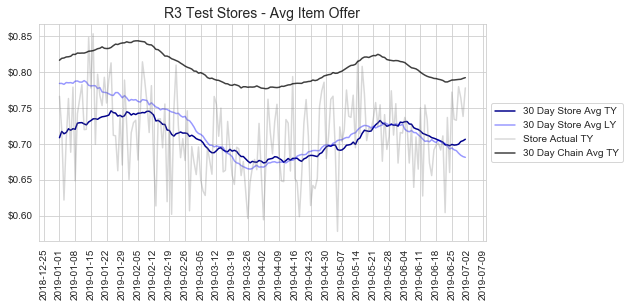

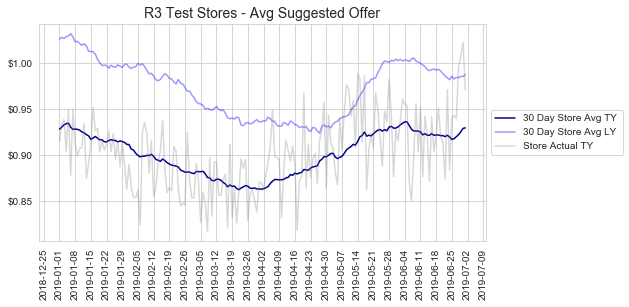

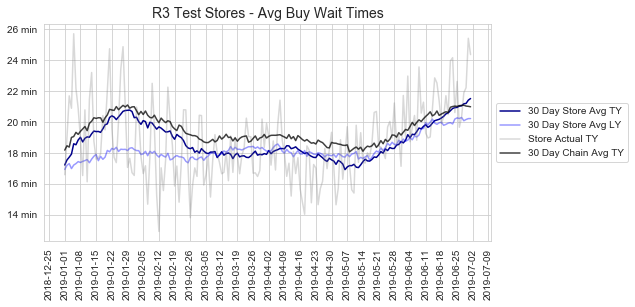

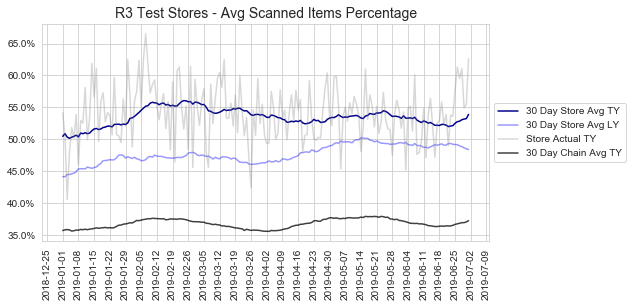

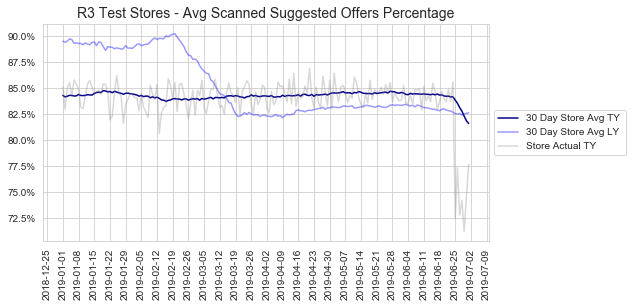

In [8]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_ShowChainAvg=False, bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

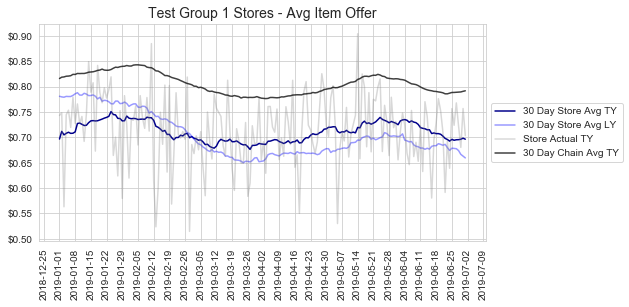

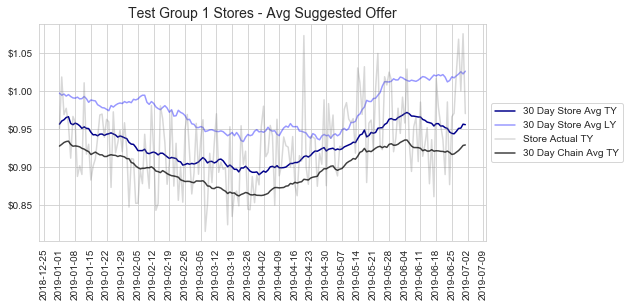

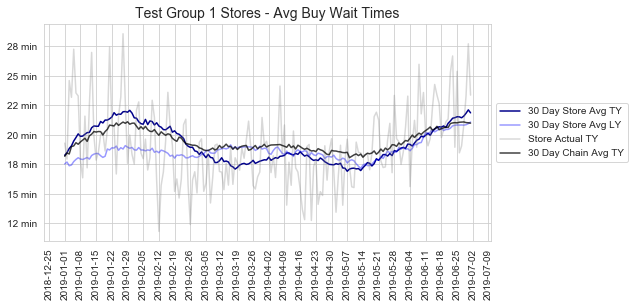

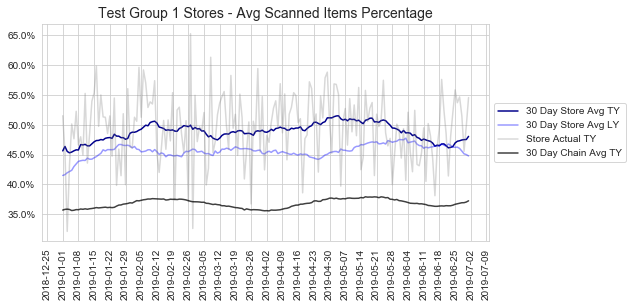

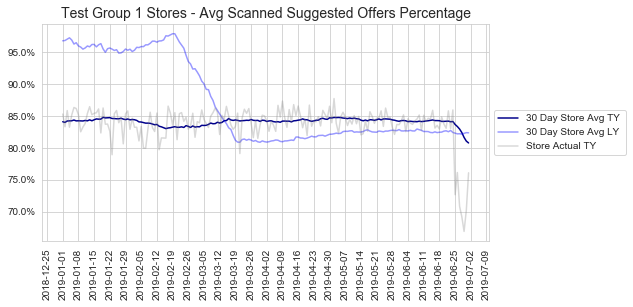

In [9]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

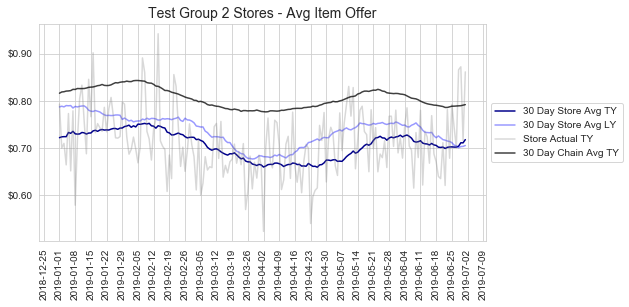

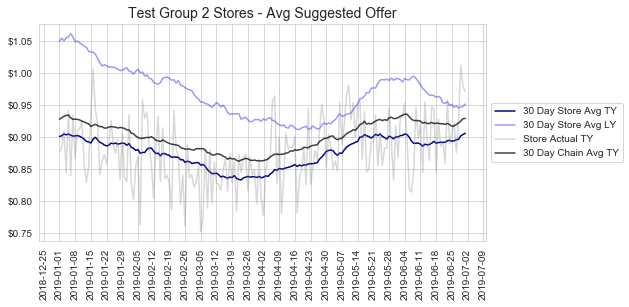

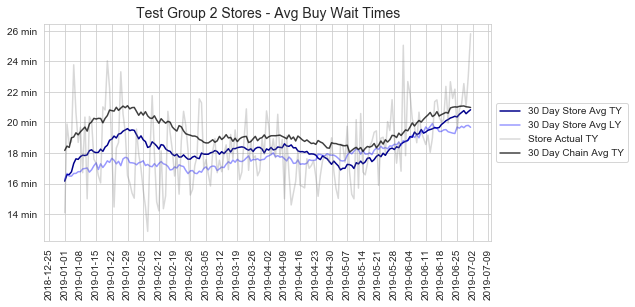

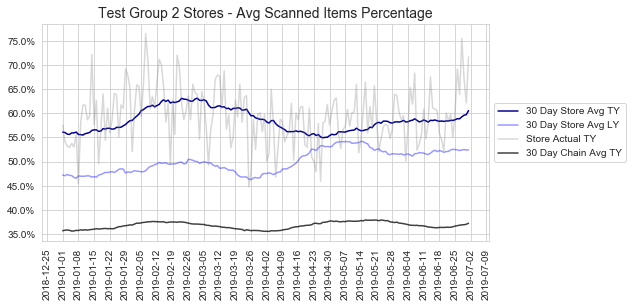

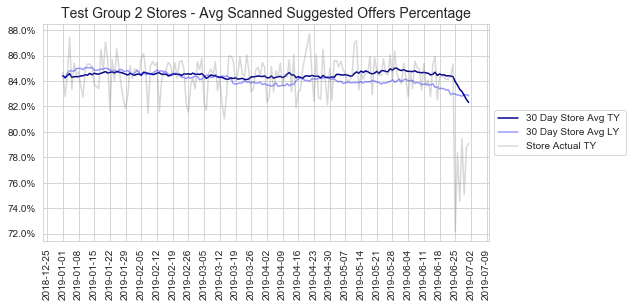

In [10]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

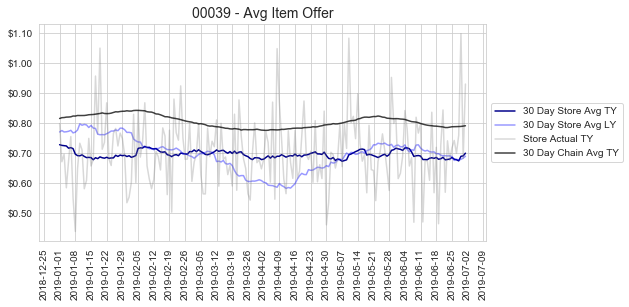

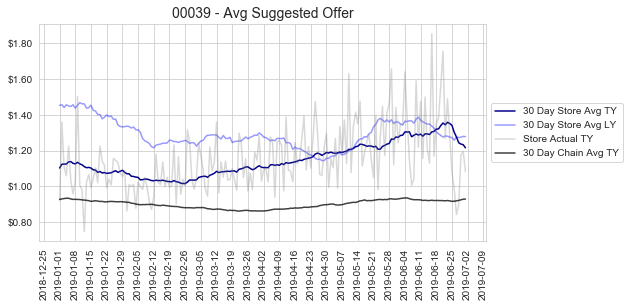

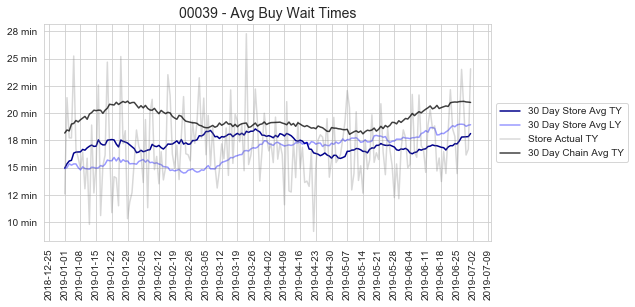

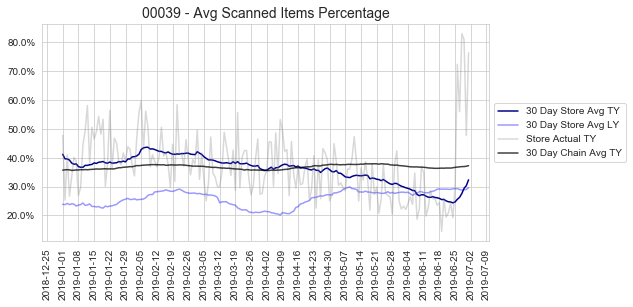

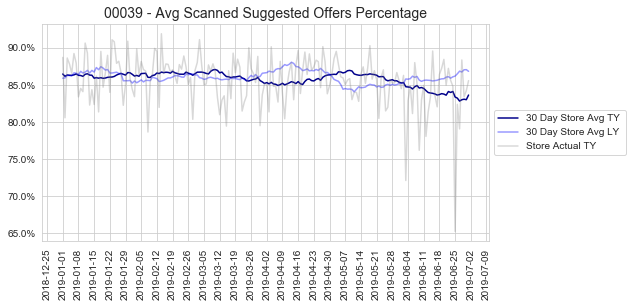

In [11]:
timeplot_AvgComp(df_BuyHeaderMetrics, '00039', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, '00039', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, '00039', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, '00039', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, '00039', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

## Chart Percentages of Chain-Based Offers Vs. Location-Based

In [12]:
NoCalcColumns = ['BusinessDate', 'LocationNo', 'VersionNo', 'TestGroup', 'BuyType']
CalcColumns = [c for c in df_BuyHeaderMetrics.columns if c not in NoCalcColumns]

In [13]:
def get_SummaryStatsAroundDate(df, date, LocName, CalcColumns):
    SumAroundDate = date
    filt_SelectGroup = df['LocationNo'] == LocName
    filt_SumAfterDate = (df['BusinessDate'] >= SumAroundDate) & filt_SelectGroup
    filt_SumBeforeDate = (df['BusinessDate'] < SumAroundDate) & filt_SelectGroup
    series_BeforeDate = df[filt_SumBeforeDate][CalcColumns].sum()
    series_AfterDate = df[filt_SumAfterDate][CalcColumns].sum()
    return series_BeforeDate, series_AfterDate

def get_EachStoreSummaryStatsAfterDate(df, date, list_locs):
    SumAfterDate = date
    filt_SelectGroup = df['LocationNo'].isin(list_locs)
    filt_SumAfterDate = (df['BusinessDate'] >= date) & filt_SelectGroup
    df_AfterDate = df[filt_SumAfterDate].groupby('LocationNo').sum()
    df_AfterDate['TestGroup'] = df[filt_SumAfterDate].groupby('LocationNo').last()['TestGroup']
    return df_AfterDate

In [14]:
series_AllBeforeDate, series_AllAfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', '00122', CalcColumns)
series_TG1BeforeDate, series_TG1AfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', 'tg1', CalcColumns)
series_TG2BeforeDate, series_TG2AfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', 'tg2', CalcColumns)

In [15]:
list_CompChainLoc_All = np.array([series_AllAfterDate['count_SuggestedOfferChain'], 
                     series_AllAfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_All = np.array([series_AllAfterDate['count_SuggestedOfferChainAdj'], 
                     series_AllAfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_All = np.array([[list_CompChainLoc_All[0]-list_CompChainLocAdj_All[0], 
                                            list_CompChainLocAdj_All[0]],
                                            [list_CompChainLoc_All[1]-list_CompChainLocAdj_All[1], 
                                            list_CompChainLocAdj_All[1]]])

list_CompChainLoc_TG1 = np.array([series_TG1AfterDate['count_SuggestedOfferChain'], 
                     series_TG1AfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_TG1 = np.array([series_TG1AfterDate['count_SuggestedOfferChainAdj'], 
                     series_TG1AfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_TG1 = np.array([[list_CompChainLoc_TG1[0]-list_CompChainLocAdj_TG1[0], 
                                            list_CompChainLocAdj_TG1[0]],
                                            [list_CompChainLoc_TG1[1]-list_CompChainLocAdj_TG1[1], 
                                            list_CompChainLocAdj_TG1[1]]])

list_CompChainLoc_TG2 = np.array([series_TG2AfterDate['count_SuggestedOfferChain'], 
                     series_TG2AfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_TG2 = np.array([series_TG2AfterDate['count_SuggestedOfferChainAdj'], 
                     series_TG2AfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_TG2 = np.array([[list_CompChainLoc_TG2[0]-list_CompChainLocAdj_TG2[0], 
                                            list_CompChainLocAdj_TG2[0]],
                                            [list_CompChainLoc_TG2[1]-list_CompChainLocAdj_TG2[1], 
                                            list_CompChainLocAdj_TG2[1]]])

In [16]:
# fig = plt.figure(figsize=(12,10))


# ax1 = plt.subplot2grid((5, 4), (0, 0),  rowspan=3, colspan=4)
# ax2 = plt.subplot2grid((5, 4), (3, 0),  rowspan=2, colspan=2)
# ax3 = plt.subplot2grid((5, 4), (3, 2),  rowspan=2, colspan=2)
# fig.subplots_adjust(top=.99, bottom=0, hspace=0, wspace=0)

# PieWidth = 0.3
# list_OuterPieLabels = ['% Offers Chain-Based', '% Offers Location-Based']
# list_InnerPieLabels = ['% Offers Chain-Based, Accepted by Buyer', '% Offers Chain-Based, Changed by Buyer', 
#                        '% Offers Location-Based, Accepted by Buyer', '% Offers Location-Based, Changed by Buyer']

# cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


# ax1.pie(list_CompChainLoc_All, labels=None, autopct='%1.1f%%', 
#        radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


# ax1.pie(list_CompChainLocNestedAdj_All.flatten(), labels=None, 
#        autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), 
#        textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))

# ax1.legend(labels=list_OuterPieLabels + list_InnerPieLabels, loc="lower center",
#            bbox_to_anchor=(1, 0.1, 0.5, 1))


# ax2.pie(list_CompChainLoc_TG1, labels=None, autopct='%1.1f%%', 
#        radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


# ax2.pie(list_CompChainLocNestedAdj_TG1.flatten(), labels=None, 
#        autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), 
#        textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))
# ax2.set_title('Test Group 1')



# ax3.pie(list_CompChainLoc_TG2, labels=None, autopct='%1.1f%%', 
#        radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


# ax3.pie(list_CompChainLocNestedAdj_TG2.flatten(), labels=None, 
#        autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
#        wedgeprops=dict(width=PieWidth, edgecolor='w'), 
#        textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))
# ax3.set_title('Test Group 2')

# plt.suptitle('Suggested Offers Release 3 - Chain-based vs Location-based Offers', fontsize=14)

# plt.show()

In [18]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

In [19]:
def decRGB2Hex(array_clr):
    list_PaletteHexStrings = []
    for l in array_clr:
        rgb255 = 255*l
        list_hexvals = ['{:02x}'.format(i.astype(int)) for i in rgb255]
        list_PaletteHexStrings.append('#' + ''.join(list_hexvals[0:3]))
    return list_PaletteHexStrings
print(decRGB2Hex(outer_colors))
print(decRGB2Hex(inner_colors))

['#3182bd', '#e6550d', '#31a354']
['#6baed6', '#9ecae1', '#fd8d3c', '#fdae6b', '#74c476', '#a1d99b']


In [20]:
list_OuterPieLabels = ['% Offers Chain-Based', '% Offers Location-Based']
list_InnerPieLabels = ['% Offers Chain-Based, Accepted by Buyer', '% Offers Chain-Based, Changed by Buyer', 
                       '% Offers Location-Based, Accepted by Buyer', '% Offers Location-Based, Changed by Buyer']

outer_values = list_CompChainLoc_All
inner_values = list_CompChainLocNestedAdj_All.flatten()

common_props = dict(labels=list_OuterPieLabels,
                    values=outer_values,)

trace1 = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    labels=list_InnerPieLabels,
    textfont=dict(size=10, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#6baed6', '#9ecae1', '#fd8d3c', '#fdae6b'],
            'line': {'color': 'white', 'width': 1}}
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=list_OuterPieLabels,
    textfont=dict(size=12, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#3182bd', '#e6550d'],
            'line': {'color': 'white', 'width': 1}}
)

layout = go.Layout(
    title=go.layout.Title(
        text='Chain-based vs Location-based Offers',
        xref='paper',
        x=0,
        xanchor='left'),
    legend=dict(x=1, y=.5, xanchor='left', yanchor='middle'),
    margin=go.layout.Margin(
        l=20,
        r=20,
        b=20,
        t=50,
        pad=4,
        autoexpand=True
    )
)

fig = go.FigureWidget(data=[trace1, trace2], layout=layout)
fig

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0.15, 0.85], 'y': [0.15,…

In [21]:
list_OuterPieLabels = ['% Offers Chain-Based', '% Offers Location-Based']
list_InnerPieLabels = ['% Offers Chain-Based, Accepted by Buyer', '% Offers Chain-Based, Changed by Buyer', 
                       '% Offers Location-Based, Accepted by Buyer', '% Offers Location-Based, Changed by Buyer']

common_props = dict(labels=list_OuterPieLabels,
                    values=outer_values,)


pcia = 0.15 # Pie Coordinate Inner-ring Adjustment
vdsf = 0.4 # Vertical division scaling factor for grid

piecoords_outer = dict(MainPieDomain = {'x': [0, 1], 'y': [vdsf, 1]}, 
                       SubPieLeftDomain = {'x': [0, 0.5], 'y': [0, vdsf]},
                       SubPieRightDomain = {'x': [0.5, 1], 'y': [0, vdsf]})
piecoords_inner = dict(MainPieDomain = {'x': [0+pcia, 1-pcia], 'y': [vdsf+pcia*(1-vdsf), 1-pcia*(1-vdsf)]}, 
                       SubPieLeftDomain = {'x': [0+pcia*0.5, 0.5-pcia*0.5], 'y': [0+pcia*vdsf, vdsf-pcia*vdsf]},
                       SubPieRightDomain = {'x': [0.5+pcia*0.5, 1-pcia*0.5], 'y': [0+pcia*vdsf, vdsf-pcia*vdsf]})

trace1_outer = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    domain=piecoords_outer['MainPieDomain'],
    values=list_CompChainLoc_All,
    labels=list_OuterPieLabels,
    textfont=dict(size=12, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#3182bd', '#e6550d'],
            'line': {'color': 'white', 'width': 1}}
)

trace1_inner = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain=piecoords_inner['MainPieDomain'],
    values=list_CompChainLocNestedAdj_All.flatten(),
    labels=list_InnerPieLabels,
    textfont=dict(size=10, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#6baed6', '#9ecae1', '#fd8d3c', '#fdae6b'],
            'line': {'color': 'white', 'width': 1}}
)

trace2_outer = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    domain=piecoords_outer['SubPieLeftDomain'],
    values=list_CompChainLoc_TG1,
    labels=list_OuterPieLabels,
    textfont=dict(size=12, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#3182bd', '#e6550d'],
            'line': {'color': 'white', 'width': 1}}
)

trace2_inner = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain=piecoords_inner['SubPieLeftDomain'],
    values=list_CompChainLocNestedAdj_TG1.flatten(),
    labels=list_InnerPieLabels,
    textfont=dict(size=10, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#6baed6', '#9ecae1', '#fd8d3c', '#fdae6b'],
            'line': {'color': 'white', 'width': 1}}
)

trace3_outer = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    domain=piecoords_outer['SubPieRightDomain'],
    values=list_CompChainLoc_TG2,
    labels=list_OuterPieLabels,
    textfont=dict(size=12, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#3182bd', '#e6550d'],
            'line': {'color': 'white', 'width': 1}}
)

trace3_inner = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain=piecoords_inner['SubPieRightDomain'],
    values=list_CompChainLocNestedAdj_TG2.flatten(),
    labels=list_InnerPieLabels,
    textfont=dict(size=10, color='white'),
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['#6baed6', '#9ecae1', '#fd8d3c', '#fdae6b'],
            'line': {'color': 'white', 'width': 1}}
)

layout = go.Layout(
    title=go.layout.Title(
        text='Chain-based vs Location-based Offers',
        xref='paper',
        x=0,
        xanchor='left'),
    legend=dict(x=0.9, y=0.5, #xanchor='left', yanchor='middle', 
                    font=dict(
                    family='sans-serif',
                    size=12,
                    color='#000')),
    width= 900,
    height=700,
    margin=go.layout.Margin(
        l=20,
        r=20,
        b=50,
        t=50,
        pad=4,
        autoexpand=True),
    annotations=[{  'font': {'size': 12},
                    'text': 'All Release 3 Stores',
                    'showarrow': False,
                    'x': 1.0,
                    'y': 0.85},
                {                
                "font": {"size": 12},
                "showarrow": False,
                "text": "Test Group 1",
                "x": .16,
                "y": -.05},
                {
                "font": {"size": 12},
                "showarrow": False,
                "text": "Test Group 2",
                "x": 0.84,
                "y": -.05}]
    
)



fig = go.FigureWidget(data=[trace1_outer, trace1_inner,
                            trace2_outer, trace2_inner,
                            trace3_outer, trace3_inner], layout=layout)
fig

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0, 1], 'y': [0.4, 1]},
 …

## Chart Percentage of Location-Based Offers By Store

In [22]:
filt_V1R3Locs = df_BuyHeaderMetrics['VersionNo'] == 'v1.r3'
list_R3Locs = list(df_BuyHeaderMetrics[filt_V1R3Locs]['LocationNo'].unique())
list_R3Locs = [i for i in list_R3Locs if i not in ['tg1', 'tg2']]

In [24]:
df_Summary = get_EachStoreSummaryStatsAfterDate(df_BuyHeaderMetrics, '2019-06-25', list_R3Locs).reset_index()
df_Summary['pct_LocOffers'] = (df_Summary['count_SuggestedOfferLoc']/
                               df_Summary['total_SuggestedOfferQuantity'])

In [25]:
df_Summary.columns

Index(['LocationNo', 'TestGroup', 'total_BuyTransactions', 'total_BuyOffers',
       'total_BuyItems', 'total_ScannedQuantity', 'total_ScannedOffers',
       'total_SuggestedOfferQuantity', 'total_SuggestedOffers',
       'total_BuyWait_Sec', 'total_SuggestedOfferAdjustedItems',
       'total_SuggestedOfferAdjustedItems_Up',
       'total_SuggestedOfferAdjustedItems_Down',
       'total_SuggestedOfferAdjustedOffers',
       'total_SuggestedOfferAdjustedOffers_Up',
       'total_SuggestedOfferAdjustedOffers_Down', 'count_SuggestedOfferChain',
       'total_SuggestedOfferChain', 'count_SuggestedOfferLoc',
       'total_SuggestedOfferLoc', 'count_SuggestedOfferChainAdj',
       'count_SuggestedOfferLocAdj', 'total_ZeroSuggestedOfferItems',
       'count_SuggestedOfferChainZero', 'count_SuggestedOfferLocZero',
       'total_ly_BuyTransactions', 'total_ly_BuyOffers', 'total_ly_BuyItems',
       'total_ly_ScannedQuantity', 'total_ly_ScannedOffers',
       'total_ly_SuggestedOfferQuantity', '

In [26]:
def getPalFromMat(str_PalName):
    snsmap = plt.get_cmap(str_PalName)
    rgbmap = snsmap(np.arange(0, snsmap.N ))
    hexmap = decRGB2Hex(rgbmap)
    return hexmap

In [27]:
hexmap_cividis = getPalFromMat('cividis')

In [29]:
keys_cividis = np.arange(0, len(hexmap_cividis), round(len(hexmap_cividis)/len(df_Summary)))
cmap_LocOffers = [hexmap_cividis[key] for key in keys_cividis]

In [97]:
# x_cats = df_PctLocOffers['LocationNo'].to_list()
# y_vals = df_PctLocOffers['pct_LocOffers'].to_list()

trace = go.Bar(
    x=df_Summary.sort_values('pct_LocOffers')['LocationNo'],
    y=df_Summary.sort_values('pct_LocOffers')['pct_LocOffers'],
    width = 0.6,
    textangle=90,
    marker=dict(color='#4070c0'),
    opacity=0.8
)

data = [trace]

layout = go.Layout(    
                title=go.layout.Title(
                        text='Percent Location-based Offers by Location',
                        xref='paper',
                        x=0,
                        xanchor='left'),
                width=800,
                height=400,
                margin=go.layout.Margin(
                    l=100,
                    r=100,
                    b=100,
                    t=50,
                    pad=10,
                    autoexpand=True),
                xaxis=dict(type='category',
                              tickangle=90),
                yaxis=dict(tickfont=dict(family='Arial, san-serif'),
                               tickformat = '%'))

fig = go.FigureWidget(data=data, layout=layout)
fig

FigureWidget({
    'data': [{'marker': {'color': '#4070c0'},
              'opacity': 0.8,
              'text…

In [41]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [42]:
df_Summary

,LocationNo,TestGroup,total_BuyTransactions,total_BuyOffers,total_BuyItems,total_ScannedQuantity,total_ScannedOffers,total_SuggestedOfferQuantity,total_SuggestedOffers,total_BuyWait_Sec,total_SuggestedOfferAdjustedItems,total_SuggestedOfferAdjustedItems_Up,total_SuggestedOfferAdjustedItems_Down,total_SuggestedOfferAdjustedOffers,total_SuggestedOfferAdjustedOffers_Up,total_SuggestedOfferAdjustedOffers_Down,count_SuggestedOfferChain,total_SuggestedOfferChain,count_SuggestedOfferLoc,total_SuggestedOfferLoc,count_SuggestedOfferChainAdj,count_SuggestedOfferLocAdj,total_ZeroSuggestedOfferItems,count_SuggestedOfferChainZero,count_SuggestedOfferLocZero,total_ly_BuyTransactions,total_ly_BuyOffers,total_ly_BuyItems,total_ly_ScannedQuantity,total_ly_ScannedOffers,total_ly_SuggestedOfferQuantity,total_ly_SuggestedOffers,total_ly_BuyWait_Sec,total_ly_SuggestedOfferAdjustedItems,total_ly_SuggestedOfferAdjustedItems_Up,total_ly_SuggestedOfferAdjustedItems_Down,total_ly_SuggestedOfferAdjustedOffers,total_ly_SuggestedOfferAdjustedOffers_Up,total_ly_SuggestedOfferAdjustedOffers_Down,count_ly_SuggestedOfferChain,total_ly_SuggestedOfferChain,count_ly_SuggestedOfferLoc,total_ly_SuggestedOfferLoc,count_ly_SuggestedOfferChainAdj,count_ly_SuggestedOfferLocAdj,total_ly_ZeroSuggestedOfferItems,count_ly_SuggestedOfferChainZero,count_ly_SuggestedOfferLocZero,rollavg_BuyTransactions,rollavg_BuyOffers,rollavg_BuyItems,rollavg_ScannedQuantity,rollavg_ScannedOffers,rollavg_SuggestedOfferQuantity,rollavg_SuggestedOffers,rollavg_BuyWait_Sec,rollavg_SuggestedOfferAdjustedItems,rollavg_SuggestedOfferAdjustedItems_Up,rollavg_SuggestedOfferAdjustedItems_Down,rollavg_SuggestedOfferAdjustedOffers,rollavg_SuggestedOfferAdjustedOffers_Up,rollavg_SuggestedOfferAdjustedOffers_Down,rollavg_CountSuggestedOfferChain,rollavg_TotalSuggestedOfferChain,rollavg_CountSuggestedOfferLoc,rollavg_TotalSuggestedOfferLoc,rollavg_SuggestedOfferChainAdj,rollavg_SuggestedOfferLocAdj,rollavg_ZeroSuggestedOfferItems,rollavg_SuggestedOfferChainZero,rollavg_SuggestedOfferLocZero,ly_rollavg_BuyTransactions,ly_rollavg_BuyOffers,ly_rollavg_BuyItems,ly_rollavg_ScannedQuantity,ly_rollavg_ScannedOffers,ly_rollavg_SuggestedOfferQuantity,ly_rollavg_SuggestedOffers,ly_rollavg_BuyWait_Sec,ly_rollavg_SuggestedOfferAdjustedItems,ly_rollavg_SuggestedOfferAdjustedItems_Up,ly_rollavg_SuggestedOfferAdjustedItems_Down,ly_rollavg_SuggestedOfferAdjustedOffers,ly_rollavg_SuggestedOfferAdjustedOffers_Up,ly_rollavg_SuggestedOfferAdjustedOffers_Down,ly_rollavg_CountSuggestedOfferChain,ly_rollavg_TotalSuggestedOfferChain,ly_rollavg_CountSuggestedOfferLoc,ly_rollavg_TotalSuggestedOfferLoc,ly_rollavg_SuggestedOfferChainAdj,ly_rollavg_SuggestedOfferLocAdj,ly_rollavg_ZeroSuggestedOfferItems,ly_rollavg_SuggestedOfferChainZero,ly_rollavg_SuggestedOfferLocZero,total_BuyWait_Min,total_ly_BuyWait_Min,rollavg_BuyWait_Min,ly_rollavg_BuyWait_Min,pct_LocOffers,avg_ChainOffer,avg_LocOffer
0,00005,1.0,567,13360.61,16645,7079.0,8571.7900,4624.0,5949.07,749921,1396.0,849.0,547.0,1828.6200,727.3300,1101.2900,3323,3878.35,1298,2065.33,978.0,415.0,874.0,802,72,596,11258.85,17996,8632.0,8666.8525,7516.0,8039.94,806620,5798.0,3287.0,2511.0,5946.3175,2054.8870,3891.4305,0,0.0,0,0.0,0.0,0.0,102.0,0,0,561,11882.2794,16175,6892.0,8062.4237,5608.0,6173.6947,659099,2641.0,1664.0,975.0,3216.4157,664.5386,2551.8769,475,3956.0132,183,2006.1483,133.535714,55.642857,195.0,119,8,565,10889.4747,17782,8173.0,8205.8369,7050.0,7527.1605,775449,5675.0,3275.0,2399.0,5782.2609,1938.7535,3843.5072,0,0.0,0,0.0,0.0,0.0,112.0,0,0,12498.683333,13443.666667,10984.983333,12924.150000,0.280709,1.167123,1.591163
1,00006,2.0,322,5679.83,8292,6615.0,5194.5000,5374.0,4452.55,476397,463.0,278.0,185.0,774.7000,317.3500,457.3500,4049,3039.87,1320,1409.07,319.0,139.0,1002.0,928,73,331,6062.29,10270,6805.0,5375.2290,5404.0,4458.52,461931,1803.0,536.0,1267.0,1499.3412,654.3302,845.0110,0,0.0,0,0.0,0.0,0.0,2350.0,0,0,308,4858.3479,9013,6736.0,4427.3350,5654.0,4275.7014,5179

In [108]:
df_Summary['avg_ChainOffer'] = df_Summary['total_SuggestedOfferChain']/df_Summary['count_SuggestedOfferChain']
df_Summary['avg_LocOffer'] = df_Summary['total_SuggestedOfferLoc']/df_Summary['count_SuggestedOfferLoc']
df_Summary['avg_SuggestedOffer_LY'] = df_Summary['total_ly_SuggestedOffers']/df_Summary['total_ly_SuggestedOfferQuantity']

In [122]:
ChainLocOfferComp_SortBy = 'avg_SuggestedOffer_LY'
trace1 = go.Bar(
    x=df_Summary.sort_values(ChainLocOfferComp_SortBy)['LocationNo'],
    y=df_Summary.sort_values(ChainLocOfferComp_SortBy)['avg_LocOffer'],
    textangle=90,
    width=0.2,
    marker=dict(color='#4070c0'),
    opacity=0.7,
    name = 'Avg Location-based Offer'
)

trace2 = go.Bar(
    x=df_Summary.sort_values(ChainLocOfferComp_SortBy)['LocationNo'],
    y=df_Summary.sort_values(ChainLocOfferComp_SortBy)['avg_ChainOffer'],
    textangle=90,
    width=0.2,
    marker=dict(color='#990000'),
    opacity=0.7,
    name = 'Avg Chain-based Offer'
)

trace3 = go.Bar(
    x=df_Summary.sort_values(ChainLocOfferComp_SortBy)['LocationNo'],
    y=df_Summary.sort_values(ChainLocOfferComp_SortBy)['avg_SuggestedOffer_LY'],
    textangle=90,
    width=0.2,
    marker=dict(color='#000000'),
    opacity=0.7,
    name = 'Avg LY Suggested Offer'
)


data = [trace2, trace1]

layout = go.Layout(    
                title=go.layout.Title(
                        text='Suggested Offer Comparison by Location',
                        xref='paper',
                        x=0,
                        xanchor='left'),
                legend=dict(orientation='h', x=0, y=1.02),
                width=800,
                height=600,
                margin=go.layout.Margin(
                    l=100,
                    r=100,
                    b=100,
                    t=50,
                    pad=10,
                    autoexpand=False),
                xaxis=dict(type='category',
                              tickangle=90),
                yaxis=dict(title='Avg Item Offer',
                           tickfont=dict(family='Arial, san-serif'),
                           tickformat = '$0.2f',
                           range=[0.4, 2.1]),
                barmode='group',
                bargap=0.5,
                bargroupgap=0.6)

fig = go.FigureWidget(data=data, layout=layout)
fig


data = [trace2, trace3, trace1]

layout = go.Layout(    
                title=go.layout.Title(
                        text='Comparison of Chain and Location Based Offers by Location',
                        xref='paper',
                        x=0,
                        xanchor='left'),
                legend=dict(orientation='h', x=0, y=1.02),
                width=800,
                height=600,
                margin=go.layout.Margin(
                    l=100,
                    r=100,
                    b=100,
                    t=50,
                    pad=10,
                    autoexpand=False),
                xaxis=dict(type='category',
                              tickangle=90),
                yaxis=dict(title='Avg Item Offer',
                           tickfont=dict(family='Arial, san-serif'),
                           tickformat = '$0.2f',
                           range=[0.4, 2.1]),
                barmode='group',
                bargap=0.4,
                bargroupgap=0)

fig = go.FigureWidget(data=data, layout=layout)
fig

FigureWidget({
    'data': [{'marker': {'color': '#990000'},
              'name': 'Avg Chain-based Offer',
  …

In [157]:
SuggScanComp_SortBy = 'total_BuyItems'
SuggScanComp_YAxisLimit = df_Summary['total_BuyItems'].max()

trace1 = go.Bar(
    x=df_Summary.sort_values(SuggScanComp_SortBy)['LocationNo'],
    y=df_Summary.sort_values(SuggScanComp_SortBy)['total_SuggestedOfferQuantity'],
    textangle=90,
    width=0.4,
    marker=dict(color='#4070c0'),
    opacity=0.7,
    name = 'Scanned, Suggestion Items'
)

trace2 = go.Bar(
    x=df_Summary.sort_values(SuggScanComp_SortBy)['LocationNo'],
    y=(df_Summary.sort_values(SuggScanComp_SortBy)['total_ScannedQuantity'] -
       df_Summary.sort_values(SuggScanComp_SortBy)['total_SuggestedOfferQuantity']),
    textangle=90,
    width=0.4,
    marker=dict(color='#990000'),
    opacity=0.7,
    name = 'Scanned, No Suggestion Items'
)

trace3 = go.Bar(
    x=df_Summary.sort_values(SuggScanComp_SortBy)['LocationNo'],
    y=(df_Summary.sort_values(SuggScanComp_SortBy)['total_BuyItems'] - 
       df_Summary.sort_values(SuggScanComp_SortBy)['total_ScannedQuantity']
      ),
    textangle=90,
    width=0.4,
    marker=dict(color='#000000'),
    opacity=0.7,
    name = 'Unscanned Items'
)


data = [trace3, trace2, trace1]

layout = go.Layout(    
                title=go.layout.Title(
                        text='Suggested Offer Comparison by Location',
                        xref='paper',
                        x=0,
                        xanchor='left'),
                legend=dict(orientation='h', x=0, y=1.1),
                width=800,
                height=600,
                margin=go.layout.Margin(
                    l=100,
                    r=100,
                    b=100,
                    t=100,
                    pad=10,
                    autoexpand=False),
                xaxis=dict(type='category',
                              tickangle=90),
                yaxis=dict(title='Total Items Purchased',
                           tickfont=dict(family='Arial, san-serif'),
                           tickformat = '.0f',
                           range=[0,SuggScanComp_YAxisLimit]),
                barmode='stack',
                bargap=0.5)

fig = go.FigureWidget(data=data, layout=layout)
fig

FigureWidget({
    'data': [{'marker': {'color': '#000000'},
              'name': 'Unscanned Items',
        …

In [150]:
df_Summary['pct_AdjOffers'] = (df_Summary['total_SuggestedOfferAdjustedItems']/
                                    df_Summary['total_SuggestedOfferQuantity'])

In [190]:
df_Summary.sort_values('pct_AdjOffers', inplace=True)
filt_testgroup1 = df_Summary['TestGroup'] == 1
filt_testgroup2 = df_Summary['TestGroup'] == 2

cmap = np.array(['#3182bd'] * len(df_Summary['TestGroup']))
cmap[filt_testgroup1] = '#3182bd'
cmap[filt_testgroup2] = '#e6550d'

trace1 = go.Bar(
    x=df_Summary['LocationNo'],
    y=df_Summary['pct_AdjOffers'],
    width = 0.4,
    textangle=90,
    marker=dict(color=cmap),
    opacity=0.8,
    name = 'Test Group 2'
)
                                     
trace2 = go.Bar(
    x=[None],
    y=[None],
    width = 0.4,
    textangle=90,
    marker=dict(color='#3182bd'),
    opacity=0.8,
    name = 'Test Group 1'
)
                                     

data = [trace2, trace1]

layout = go.Layout(    
                title=go.layout.Title(
                        text='Percent Suggested Offers Changed by Location',
                        xref='paper',
                        x=0,
                        xanchor='left'),
                width=800,
                height=400,
                margin=go.layout.Margin(
                    l=100,
                    r=100,
                    b=100,
                    t=50,
                    pad=10,
                    autoexpand=True),
                xaxis=dict(type='category',
                              tickangle=90),
                yaxis=dict(tickfont=dict(family='Arial, san-serif'),
                               tickformat = '%'))

fig = go.FigureWidget(data=data, layout=layout)
fig

FigureWidget({
    'data': [{'marker': {'color': '#3182bd'},
              'name': 'Test Group 1',
           …

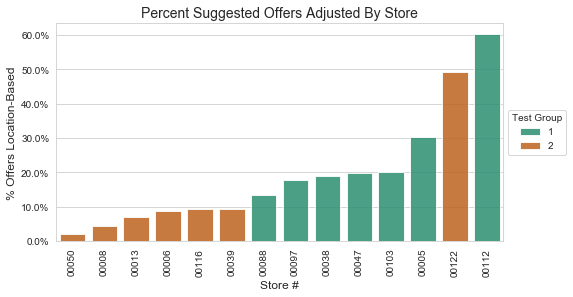

In [34]:
sns.set_style('whitegrid')
list_PlotOrder = df_Summary.sort_values('pct_AdjOffers')['LocationNo'].to_list()

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='LocationNo', y='pct_LocOffers', data=df_AdjOffers, ax=ax, 
            order=list_PlotOrder, palette = 'Dark2', hue='TestGroup', dodge=False, alpha = 0.85)
#ax.set_axisbelow(False)
#ax.grid(axis='y', color='white')
plt.xticks(rotation=90)
ax.set_xlabel('Store #', fontsize=12)
ax.set_ylabel('% Offers Location-Based', fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1%}')) 


handles, labels = ax.get_legend_handles_labels()
fmt_labels = []  
for s in labels:
    fmt_labels.append('{:.0f}'.format(float(s)))

ax.legend(handles, fmt_labels, title='Test Group', loc="center left", bbox_to_anchor=(1, 0, 0, 1))



plt.title('Percent Suggested Offers Adjusted By Store', fontsize=14)
plt.show()

In [35]:
df_TotOffers = get_EachStoreSummaryStatsAfterDate(df_BuyHeaderMetrics, '2019-06-25', list_R3Locs).reset_index()

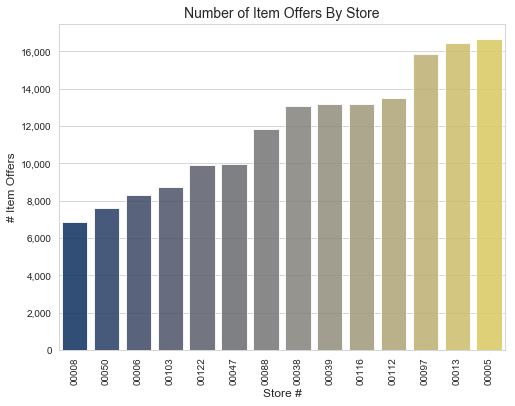

In [135]:
sns.set_style('whitegrid')
list_PlotOrder = df_TotOffers.sort_values('total_BuyItems')['LocationNo'].to_list()

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='LocationNo', y='total_BuyItems', data=df_AdjOffers, ax=ax, 
            order=list_PlotOrder, palette = 'cividis', alpha = 0.85)
#ax.set_axisbelow(False)
#ax.grid(axis='y', color='white')
plt.xticks(rotation=90)
ax.set_xlabel('Store #', fontsize=12)
ax.set_ylabel('# Item Offers', fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 
plt.title('Number of Item Offers By Store', fontsize=14)
plt.show()

In [ ]:
df_TotOffers.columns